In [1]:
! nvidia-smi

Fri Dec  6 12:11:46 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2
import numpy as np
import glob
import os

In [4]:
pip install split-folders

In [57]:
import splitfolders
import os

input_folder="/content/drive/MyDrive/Computer Vision and Machine Learning for Medical Data Analysis/Module-4/brain_tumor_dataset"

output="/content/in2"

splitfolders.ratio(input_folder, output, seed=42, ratio=(0.5,.5,0)) ### train 75%, val 15%, test 10%

Copying files: 253 files [00:03, 75.01 files/s] 


Import libraries

In [22]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [6]:
####### transfer learning model

################# import various transfer elarning models ###################

#from tensorflow.keras.applications.inception_v3 import InceptionV3
#from tensorflow.keras.applications.vgg16 import VGG16
#from tensorflow.keras.applications.vgg19 import VGG19
#from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import Xception
#############################################################################

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from tensorflow.keras.applications.vgg16 import VGG16
import tensorflow as tf


##Simple CNN

In [58]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2))) ##output

model.add(layers.Conv2D(64, (3, 3), activation='relu')) ##input
model.add(layers.Conv2D(64, (3, 3), activation='relu')) ##input
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu')) ##output feature matrix
model.add(layers.Flatten()) #1D feature matrix

model.add(layers.Dense(64, activation='softmax'))
model.add(layers.Dense(2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
adam = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(
  loss='categorical_crossentropy', ### for multi class calsification
  #loss='binary_crossentropy', ### for binary calsification
  optimizer=adam,
  metrics=['accuracy']
)

#########################################################################

model.optimizer.get_config()
print("\n\n")
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 52, 52, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 173056)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │      22,151,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,207,874 (84.72 MB)

 Trainable params: 22,207,874 (84.72 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
### image datagenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/input/train',
                                                 target_size = (224,224),
                                                 batch_size = 8,
                                                 class_mode = 'categorical')

val_set = val_datagen.flow_from_directory('/content/input/val',
                                            target_size = (224,224),
                                            batch_size = 8,
                                            class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory('/content/input/test',
                                            target_size = (224,224),
                                            batch_size = 8,
                                            class_mode = 'categorical')


Found 189 images belonging to 2 classes.
Found 37 images belonging to 2 classes.
Found 27 images belonging to 2 classes.


In [55]:
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger

# Define the correct filepath ending in `.weights.h5`
filepath = "/content/CNN.weights.h5"

# Define the ModelCheckpoint
checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,
                               save_weights_only=True, save_best_only=True, mode='max')

# Define the CSVLogger
log_csv = CSVLogger('/content/CNN.csv', separator=',', append=False)

# List of callbacks
callbacks_list = [checkpoint1, log_csv]

# Fit the model
r = model.fit(
    training_set,
    epochs=100,
    validation_data=val_set,
    steps_per_epoch=len(training_set),
    validation_steps=len(val_set),
)


Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.3905 - loss: 6.2948 - val_accuracy: 0.3784 - val_loss: 6.0987
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.3619 - loss: 5.8326 - val_accuracy: 0.3784 - val_loss: 6.0987
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.4012 - loss: 6.4666 - val_accuracy: 0.3784 - val_loss: 6.0987


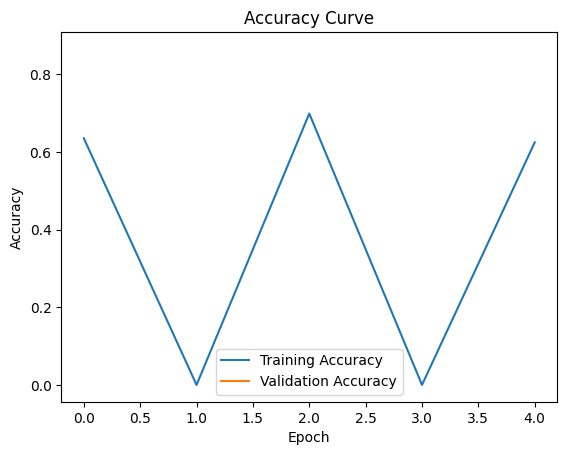

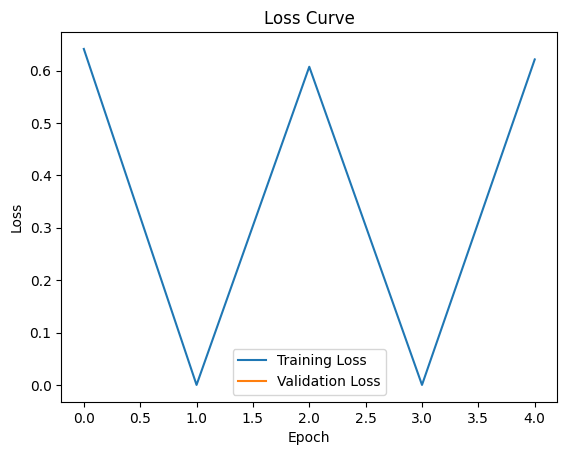

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('/content/CNN.csv')

# Plot accuracy
plt.plot(data['epoch'], data['accuracy'], label='Training Accuracy')
plt.plot(data['epoch'], data['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(data['epoch'], data['loss'], label='Training Loss')
plt.plot(data['epoch'], data['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [46]:
# Load weights
model.load_weights('/content/CNN.weights.h5')  ### Load weights from the .weights.h5 file

# Evaluate the model
preds = model.evaluate(test_set)

# Print results
print("Loss = " + str(preds[0]))
print("Test Accuracy = " + str(preds[1]))

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8750 - loss: 0.3955

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 287ms/step - accuracy: 0.8657 - loss: 0.4603
Loss = 0.4978776276111603
Test Accuracy = 0.8518518805503845


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step


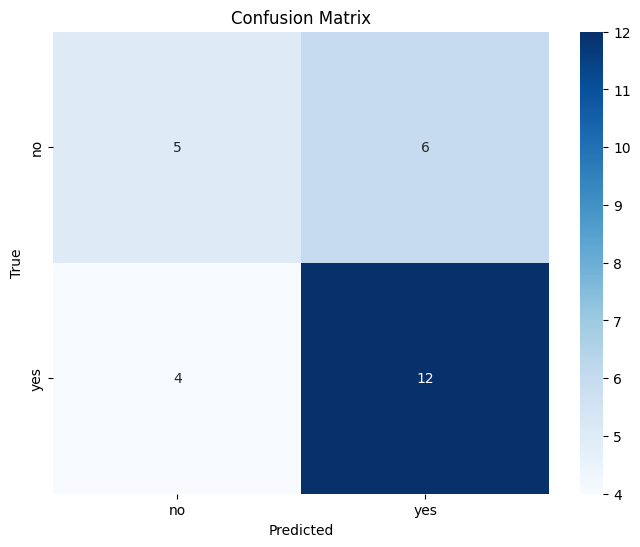

              precision    recall  f1-score   support

          no       0.56      0.45      0.50        11
         yes       0.67      0.75      0.71        16

    accuracy                           0.63        27
   macro avg       0.61      0.60      0.60        27
weighted avg       0.62      0.63      0.62        27



In [47]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions using the trained model
y_pred = model.predict(test_set)  # Use model.predict instead of model.predict_generator
y_true = test_set.labels  # Ground truth labels

# Generate a confusion matrix
confusion_mat = confusion_matrix(y_true, np.argmax(y_pred, axis=1))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=test_set.class_indices.keys(), yticklabels=test_set.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# You can also generate a classification report for more detailed metrics
class_report = classification_report(y_true, np.argmax(y_pred, axis=1), target_names=test_set.class_indices.keys())
print(class_report)


##Transfer Learning Models

In [10]:
########
IMAGE_SIZE = [224,224]
CLASS=2
######


#mod =  tf.keras.applications.VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#mod = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#mod = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#mod = DenseNet201(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
mod = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#mod = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#mod = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in mod.layers:
    layer.trainable = False

x = Flatten()(mod.output)

prediction = Dense(CLASS, activation='elu')(x)

model = Model(inputs=mod.input, outputs=prediction)

############################ optimizer and learning rate ##################

adam = tf.keras.optimizers.Nadam(learning_rate=0.01)

model.compile(
  loss='categorical_crossentropy', ### for multi class calsification
  #loss='binary_crossentropy', ### for binary calsification
  optimizer=adam,
  metrics=['accuracy']
)

#########################################################################


model.optimizer.get_config()
print("\n\n")
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │          50,178 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,764,866 (56.32 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [12]:
### image datagenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/input/train',
                                                 target_size = (224,224),
                                                 batch_size = 8,
                                                 class_mode = 'categorical')

val_set = val_datagen.flow_from_directory('/content/input/val',
                                            target_size = (224,224),
                                            batch_size = 8,
                                            class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory('/content/input/test',
                                            target_size = (224,224),
                                            batch_size = 8,
                                            class_mode = 'categorical')

Found 189 images belonging to 2 classes.
Found 37 images belonging to 2 classes.
Found 27 images belonging to 2 classes.


In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger

# Define the correct filepath ending in `.weights.h5`
filepath = "/content/VGG16.weights.h5"

# Define the ModelCheckpoint
checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,
                               save_weights_only=True, save_best_only=True, mode='max')

# Define the CSVLogger
log_csv = CSVLogger('/content/VGG16.csv', separator=',', append=False)

# List of callbacks
callbacks_list = [checkpoint1, log_csv]

# Fit the model
r = model.fit(
    training_set,
    epochs=100,
    validation_data=val_set,
    steps_per_epoch=len(training_set),
    validation_steps=len(val_set),
)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.3524 - loss: 9.2190
Epoch 1: val_accuracy improved from -inf to 0.37838, saving model to /content/VGG16.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 387ms/step - accuracy: 0.3538 - loss: 9.2329 - val_accuracy: 0.3784 - val_loss: 10.0194
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
 1/24 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.3750 - loss: 10.0738

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_accuracy available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.3982 - loss: 9.7001
Epoch 3: val_accuracy did not improve from 0.37838
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.3977 - loss: 9.7078 - val_accuracy: 0.3784 - val_loss: 10.0194
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.3858 - loss: 9.9000
Epoch 5: val_accuracy did not improve from 0.37838
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.3858 - loss: 9.8997 - val_accuracy: 0.3784 - val_loss: 10.0194


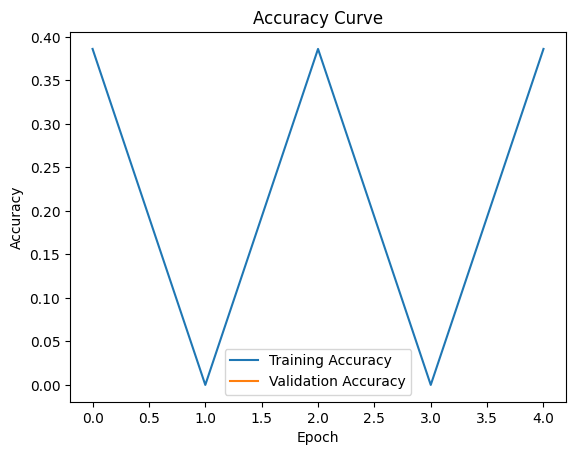

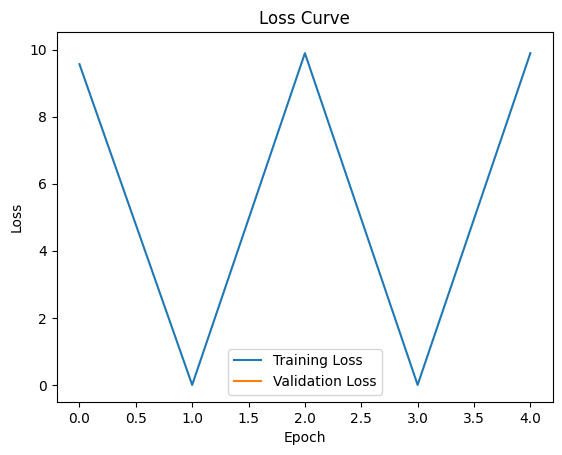

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('/content/VGG16.csv')

# Plot accuracy
plt.plot(data['epoch'], data['accuracy'], label='Training Accuracy')
plt.plot(data['epoch'], data['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(data['epoch'], data['loss'], label='Training Loss')
plt.plot(data['epoch'], data['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [20]:
# Load weights
model.load_weights('/content/VGG16.weights.h5')  ### Load weights from the .weights.h5 file

# Evaluate the model
preds = model.evaluate(test_set)

# Print results
print("Loss = " + str(preds[0]))
print("Test Accuracy = " + str(preds[1]))


2/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.4688 - loss: 8.5627 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.4338 - loss: 9.1261
Loss = 9.551464080810547
Test Accuracy = 0.40740740299224854


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step


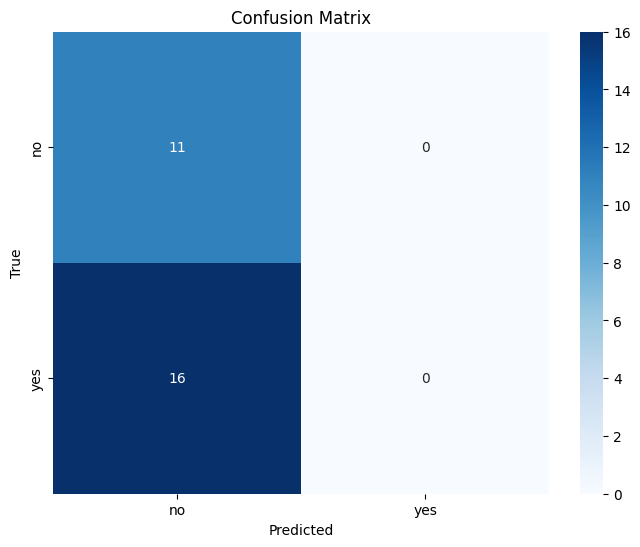

              precision    recall  f1-score   support

          no       0.41      1.00      0.58        11
         yes       0.00      0.00      0.00        16

    accuracy                           0.41        27
   macro avg       0.20      0.50      0.29        27
weighted avg       0.17      0.41      0.24        27



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions using the trained model
y_pred = model.predict(test_set)  # Use model.predict instead of model.predict_generator
y_true = test_set.labels  # Ground truth labels

# Generate a confusion matrix
confusion_mat = confusion_matrix(y_true, np.argmax(y_pred, axis=1))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=test_set.class_indices.keys(), yticklabels=test_set.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# You can also generate a classification report for more detailed metrics
class_report = classification_report(y_true, np.argmax(y_pred, axis=1), target_names=test_set.class_indices.keys())
print(class_report)
